# Veriyi Yükleme

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir=r"C:Tensorflow\f1"

train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="training",batch_size=2)

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(500,500),subset="validation",batch_size=2)

Found 252 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


# Görselleştirme

(2, 500, 500, 3)
[0. 0. 1. 0.]


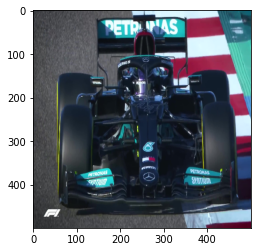

(2, 500, 500, 3)
[0. 0. 0. 1.]


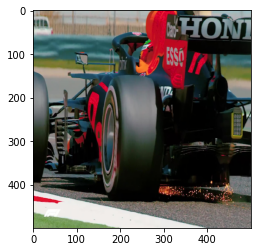

(2, 500, 500, 3)
[0. 1. 0. 0.]


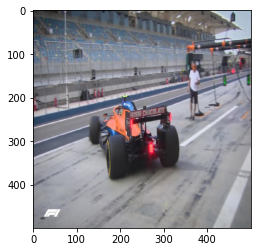

(2, 500, 500, 3)
[0. 0. 0. 1.]


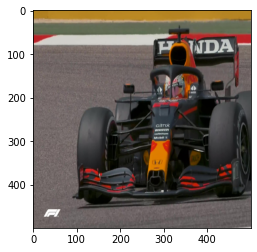

(2, 500, 500, 3)
[0. 1. 0. 0.]


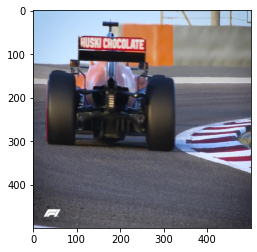

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

for _ in range(5):
    img, label = test_datagen.next()
    print(img.shape)   
    plt.imshow(img[0])
    print(label[0])   

    plt.show()

# Kütüphaneler

In [3]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers,activations

# Model Oluşumu

In [4]:
model=Sequential()

model.add(layers.Conv2D(filters=4,activation="elu",kernel_size=(5,5),input_shape=(500,500,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=8,activation="elu",kernel_size=(3,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=16,activation="elu",kernel_size=(2,2)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=32,activation="elu",kernel_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(100,activation="elu"))
model.add(layers.Dense(50,activation="elu"))
model.add(layers.Dense(4,activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 496, 496, 4)       304       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 248, 248, 4)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 246, 246, 8)       296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 123, 123, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 122, 122, 16)      528       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        2

# Callbacks

### Tensorboard: 

embeddings_freq = Gömme katmanlarının görselleştirileceği frekans (dönemlerde). 0 olarak ayarlanırsa yerleştirmeler görselleştirilmez.

histogram_freq = Modelin katmanları için aktivasyon ve ağırlık histogramlarının hesaplanacağı frekans (dönem cinsinden). 0 olarak ayarlanırsa histogramlar hesaplanmayacaktır.

write_graph = Grafiğin TensorBoard'da görselleştirilip görselleştirilmeyeceği. write_graph, True olarak ayarlandığında günlük dosyası oldukça büyük olabilir.

write_images = TensorBoard'da görüntü olarak görselleştirmek için model ağırlıkları yazıp yazmama.


### ModelCheckpoint:

monitor = izlenecek metrik türü lossa göre

save_best_only = True ise, sadece model "en iyi" olarak kabul edildiğinde kaydeder ve izlenen miktara göre en son en iyi modelin üzerine yazılmaz. Dosya yolu {epoch} gibi biçimlendirme seçenekleri içermiyorsa, her yeni daha iyi model dosya yolunun üzerine yazılacaktır.

save_weights_only = True ise, yalnızca modelin ağırlıkları kaydedilir (model.save_weights(filepath)), aksi takdirde tam model kaydedilir (model.save(filepath)).

### EarlyStopping:

monitor = izlenecek metrik türü lossa göre

mode = {"auto", "min", "max"} seçeneklerinden biri. Min modunda, izlenen miktarın azalması durduğunda eğitim duracaktır; "max" modunda, izlenen miktarın artması durduğunda duracaktır; "otomatik" modda, yön, izlenen miktarın adından otomatik olarak çıkarılır.



In [28]:
import math
epoch=5
initial_learning_rate = 0.001
def lr_step_decay(epoch, lr):
    drop_rate = 0.5
    epochs_drop = 1.0 # kaç çağda bir düşürsün
    return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))

In [14]:
from tensorflow.keras.callbacks import CSVLogger,EarlyStopping,ModelCheckpoint,TensorBoard,LearningRateScheduler

In [22]:
callbacks=[
    
    CSVLogger("./training.csv",separator='-'),
    TensorBoard(write_graph=True,write_images=1),
    ModelCheckpoint("./best.h5",verbose=1,save_best_only=True,save_weights_only=True,monitor="loss"),
    LearningRateScheduler(lr_step_decay,verbose=1)
    #EarlyStopping(monitor="loss",verbose=1,mode="auto")
    
]

In [23]:
callbacks

# Model Eğitimi

In [24]:
optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001)
loss=tf.keras.losses.CategoricalCrossentropy()

In [25]:
model.compile(optimizer=optimizer,loss=loss,metrics=["mse","accuracy"])

In [29]:
result=model.fit(train_datagen,epochs=epoch,verbose=1,validation_data=test_datagen,callbacks=callbacks)

Epoch 1/5

Epoch 00001: LearningRateScheduler setting learning rate to 0.001.
126/126 [==============================] - 18s 130ms/step - loss: 0.5303 - mse: 0.0662 - accuracy: 0.8056 - val_loss: 1.0896 - val_mse: 0.1450 - val_accuracy: 0.6071

Epoch 00001: loss improved from inf to 0.53029, saving model to .\best.h5
Epoch 2/5

Epoch 00002: LearningRateScheduler setting learning rate to 0.0005.
126/126 [==============================] - 16s 125ms/step - loss: 0.1106 - mse: 0.0122 - accuracy: 0.9722 - val_loss: 1.2804 - val_mse: 0.1492 - val_accuracy: 0.6071

Epoch 00002: loss improved from 0.53029 to 0.11060, saving model to .\best.h5
Epoch 3/5

Epoch 00003: LearningRateScheduler setting learning rate to 0.00025.
126/126 [==============================] - 16s 128ms/step - loss: 0.0429 - mse: 0.0024 - accuracy: 1.0000 - val_loss: 1.2785 - val_mse: 0.1639 - val_accuracy: 0.6071

Epoch 00003: loss improved from 0.11060 to 0.04293, saving model to .\best.h5
Epoch 4/5

Epoch 00004: Learning

In [30]:
result.history

{'loss': [0.5302872657775879,
  0.11060001701116562,
  0.042933881282806396,
  0.030245697125792503,
  0.026477886363863945],
 'mse': [0.06615858525037766,
  0.012156189419329166,
  0.0023834421299397945,
  0.0012247134000062943,
  0.0009534556302241981],
 'accuracy': [0.8055555820465088, 0.9722222089767456, 1.0, 1.0, 1.0],
 'val_loss': [1.0896096229553223,
  1.2803670167922974,
  1.2785402536392212,
  1.3094470500946045,
  1.3274576663970947],
 'val_mse': [0.14504800736904144,
  0.14917603135108948,
  0.1638641506433487,
  0.16490711271762848,
  0.16492757201194763],
 'val_accuracy': [0.6071428656578064,
  0.6071428656578064,
  0.6071428656578064,
  0.6071428656578064,
  0.6071428656578064],
 'lr': [0.001, 0.0005, 0.00025, 0.000125, 6.25e-05]}

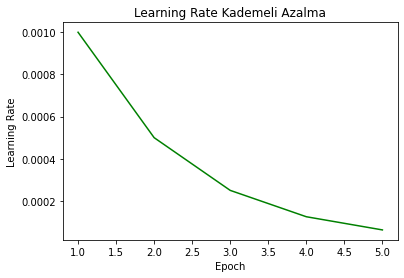

In [31]:
epoch=range(1,len(result.history["accuracy"])+1)
plt.plot(epoch,result.history["lr"],color="g")
plt.title("Learning Rate Kademeli Azalma")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.show()